# Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  seaborn as sns
sns.set()

In [3]:
DATA_PATH = "/mnt/hdmenezess42/GitProjects/MLCourseAI/data/"
data = pd.read_csv(f"{DATA_PATH}telecom_churn.csv")

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


| Name                    | Description                              | Value Type           | Statistical Type        |
|-------------------------|------------------------------------------|----------------------|--------------------------|
| State                   | State abbreviation (like KS = Kansas)    | String               | Categorical              |
| Account length          | How long the client has been with the company | Numerical        | Quantitative             |
| Area code               | Phone number prefix                       | Numerical            | Categorical              |
| International plan      | International plan (on/off)              | String (“Yes”/”No”)  | Categorical/Binary       |
| Voice mail plan         | Voicemail (on/off)                       | String (“Yes”/”No”)  | Categorical/Binary       |
| Number vmail messages   | Number of voicemail messages             | Numerical            | Quantitative             |
| Total day minutes       | Total duration of daytime calls          | Numerical            | Quantitative             |
| Total day calls         | Total number of daytime calls            | Numerical            | Quantitative             |
| Total day charge        | Total charge for daytime services        | Numerical            | Quantitative             |
| Total eve minutes       | Total duration of evening calls          | Numerical            | Quantitative             |
| Total eve calls         | Total number of evening calls            | Numerical            | Quantitative             |
| Total eve charge        | Total charge for evening services        | Numerical            | Quantitative             |
| Total night minutes     | Total duration of night-time calls       | Numerical            | Quantitative             |
| Total night calls       | Total number of night-time calls         | Numerical            | Quantitative             |
| Total night charge      | Total charge for night-time services     | Numerical            | Quantitative             |
| Total intl minutes      | Total duration of international calls    | Numerical            | Quantitative             |
| Total intl calls        | Total number of international calls      | Numerical            | Quantitative             |
| Total intl charge       | Total charge for international calls     | Numerical            | Quantitative             |
| Customer service calls  | Number of calls to customer service      | Numerical            | Categorical/Ordinal      |


The churn column is the target variable.
True for losted customer
False for retained customer

# Univariate Visualization
- Looks at one feature at a time
- Usually mostly interested in the distribution of its values and ignore other features in the dataset


## Quantitative features

### Histograms and density_plots

- The easiest way to take a look at the distribution of a numerical variable is to use the `hist()` method of the `DataFrame`

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

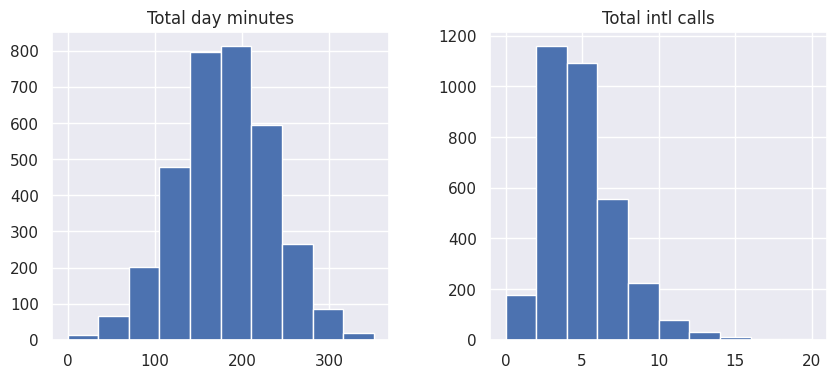

In [5]:
features = ["Total day minutes", "Total intl calls"]
data[features].hist(figsize=(10, 4))

- Knowing the distribution of the feature values becomes essential when you use Machine Learning methods that assume a particular type (most often Gaussian)

- We aslo have the **Kernel Density Plots**.
- Conidered a smoothed version of the histogram.
- Advantage over hist is that they do not depend on the size of the bins.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

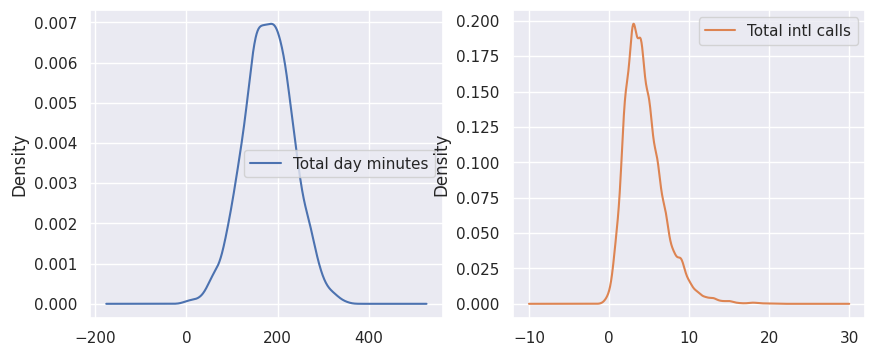

In [6]:
data[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10, 4))

- Seaborn has a similar method `histplot()`.
- Let's look at the distribution of **Total day minutes** and plot the **Kernel Density Estimate** on top

<Axes: xlabel='Total day minutes', ylabel='Density'>

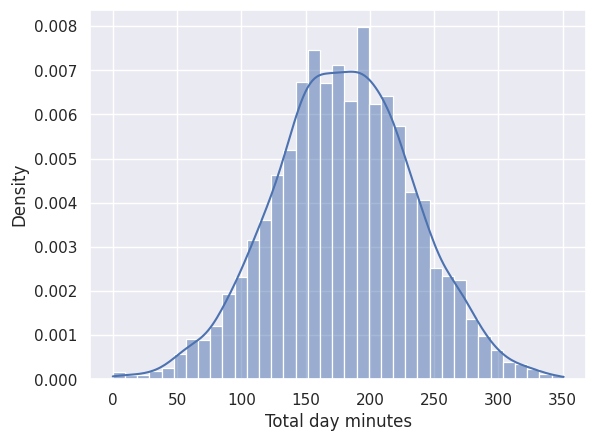

In [7]:
sns.histplot(data['Total day minutes'], kde=True, stat="density")

- Let's look at the distribution of **Total intl calls** and plot the **Kernel Density Estimate** on top

<Axes: xlabel='Total intl calls', ylabel='Density'>

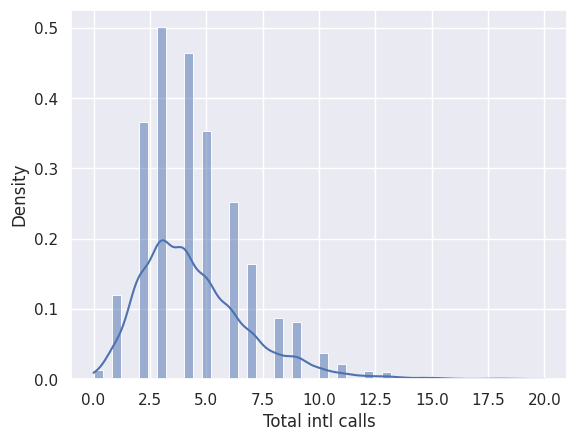

In [8]:
sns.histplot(data['Total intl calls'], kde=True, stat="density")

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin

### Box plot

<Axes: xlabel='Total intl calls'>

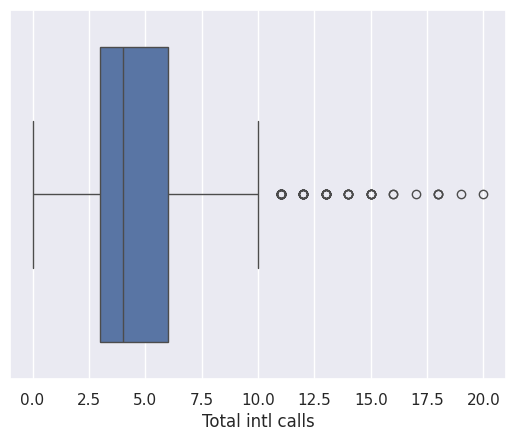

In [9]:
sns.boxplot(x="Total intl calls", data=data)

#### How to interpret:
- Its components are:
    - The box
    - THe so-called whiskers
    - A number of individual points

- The box by itself ilustrates the interquantile spread of the distribution
    - Its length is determined by the $25^{th}(Q1)$ and $75^{th}(Q3)$ percentiles
    - The vertical line inside the box marks the 50% of the distribution

- The whiskers are the lines extending from the box. They represent the entire scatter of data points
    - Specifically the points that fall within the interval $(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)$.
    - $IQR = Q3 - Q1$ == interquartile range

- Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points alogn the central axis

### Violing plot

- look at the figures below. The left is the boxplot and the right is the violin plot with the kernel density estimate on both sides

<Axes: ylabel='Total intl calls'>

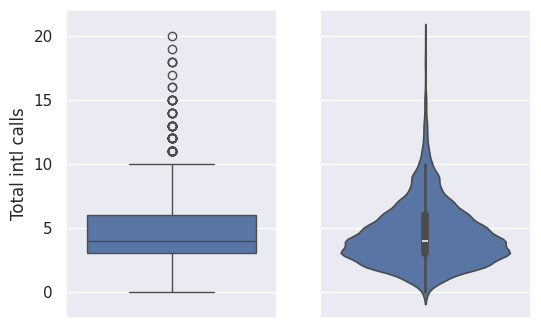

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data["Total intl calls"], ax=axes[0])
sns.violinplot(data=data["Total intl calls"], ax=axes[1])

- Combines the structure of a boxplot with a (K)ernel (D)ensity (E)stimate of data -- that is, it displays a smoothed version of the PDF
    - The width of the violin at each vertical point represents the relative density of the data at that value
    - The median and quartiles often still appear overlapping

### Describe()
- DataFrame method to inform relevant information

In [11]:
data[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


## Categorical and binary features

- Take on a fixed number of values
- Each of these values assigns an observation to a corresponding group, known as a category
- Reflects some qualitative property of this example

- Binary variables are an important special case of **categorical variables** when the number of possible values is exactly 2.
    - If the values of a categorical variable are ordered, it is called ordinal

### Frequency table

In [13]:
data['Churn'].value_counts()
# Default sorted from the most to the least frequently occurring values

Churn
False    2850
True      483
Name: count, dtype: int64

### Bar plot

- A graphical representation of the frequence table
- We can create this using the `seaborn` function **countplot()**

<Axes: xlabel='Customer service calls', ylabel='count'>

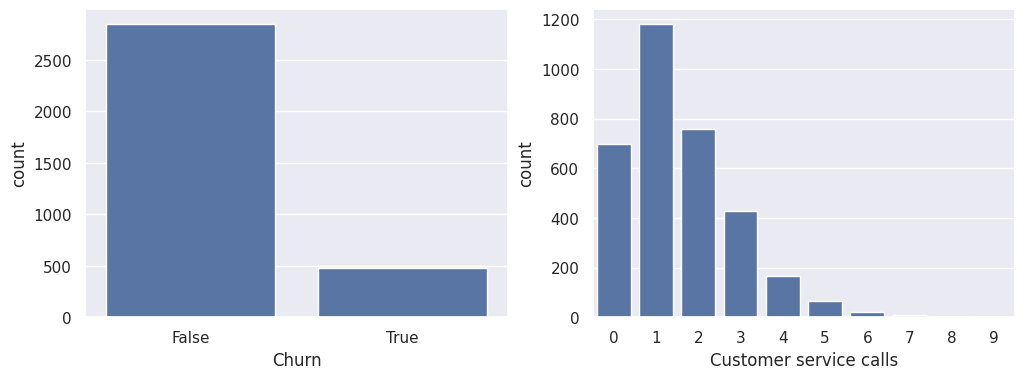

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=data, ax=axes[0])
sns.countplot(x='Customer service calls', data=data, ax=axes[1])

> While the hist and the bar plot may look smiliar, there are several differences between then:
1. Histograms are best suited for look at the distribution of numerical variables, while bar plost are used for categorical features

2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axies: numbers, strings, booleans.

3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; The ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Custmer service calls in our data), the bars are usually ordered by variables value

- The left chart illustrates the imbalance in our target variable.
- Th ebar plot fo Customer services calls on the right gives a hint that majority of customers resolve their problems in maximum 2-3 calls.

## Multivariate visualization